## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from sympy import *
from numpy.linalg import norm
from sklearn.metrics import r2_score

In [2]:
np.seterr(all='warn')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [8]:
RegData = pd.read_csv("RegData.csv", header=None)
RegData

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


In [9]:
inputs = np.array(list(RegData[0]))
outputs = np.array(list(RegData[1]))

#### Explore your data

In [10]:
print(RegData[0])
print(RegData[1])

0     2.9
1     6.7
2     4.9
3     7.9
4     9.8
5     6.9
6     6.1
7     6.2
8     6.0
9     5.1
10    4.7
11    4.4
12    5.8
Name: 0, dtype: float64
0     4.0
1     7.4
2     5.0
3     7.2
4     7.9
5     6.1
6     6.0
7     5.8
8     5.2
9     4.2
10    4.0
11    4.4
12    5.2
Name: 1, dtype: float64


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [11]:
X = np.array(list(RegData[0]))
y = np.array(list(RegData[1]))

#### Explore your data

In [12]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [13]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

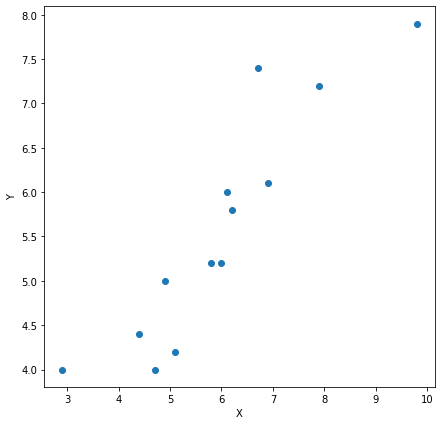

In [8]:
plt.figure(figsize=(7, 7));
plt.scatter(X,y)
plt.xlabel('X');
plt.ylabel('Y');

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

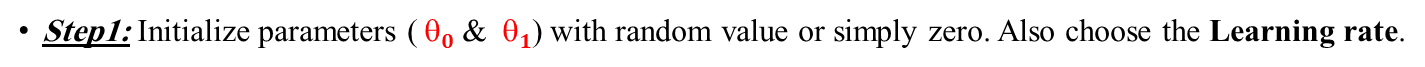

In [21]:
theta_0 = 0
theta_1 = 0

Learning_rate = 0.1

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.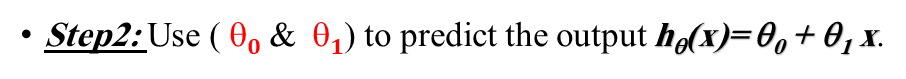
#### Note: you will need to iterate through all data points

In [22]:
x = Symbol('x')
h = theta_0 + theta_1 * x

h_result = []
for x_value in X:
    h_result.append(h.subs(x, x_value))

h_result = np.array(h_result, dtype=float)
h_result

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).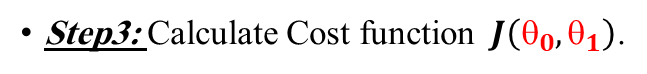
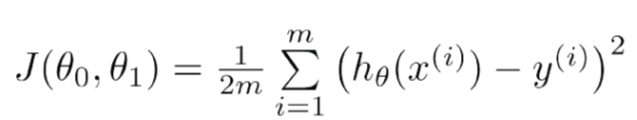

In [23]:
J = (1/(2 * len(X))) * (norm(h_result - y)**2)
J

16.305384479692314

### Step4: Calculate the gradient.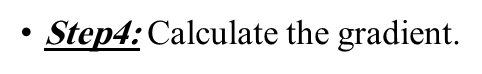
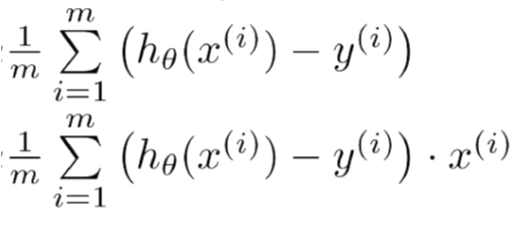

In [24]:
DeltaJ_theta_0 = (1 / len(X)) * np.sum(h_result - y)
DeltaJ_theta_1 = (1 / len(X)) * np.sum((h_result - y) * X)

### Step5: Update the parameters (simultaneously).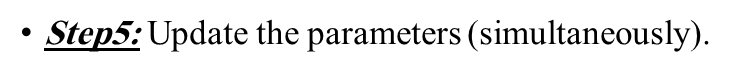
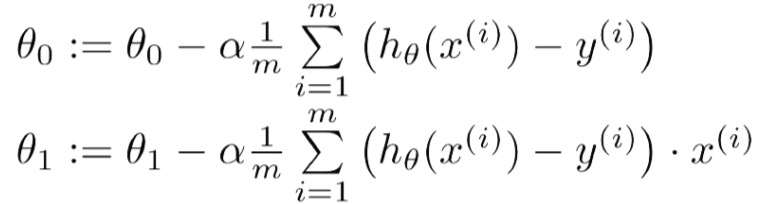

In [25]:
theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.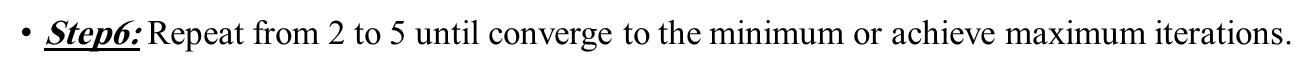

In [26]:
while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:
    h = theta_0 + theta_1 * x
    
    h_result = []
    for x_value in X:
        h_result.append(h.subs(x, x_value))

    h_result = np.array(h_result, dtype=float)
    h_result
    
    J = (1/(2 * len(X))) * (norm(h_result - y)**2)
    
    DeltaJ_theta_0 = (1 / len(X)) * np.sum(h_result - y)
    DeltaJ_theta_1 = (1 / len(X)) * np.sum((h_result - y) * X)
    
    theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
    theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)

<ipython-input-26-3876d4f184c5>:17: RuntimeWarning: invalid value encountered in double_scalars
  theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)


In [27]:
theta_0

nan

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [15]:
h = theta_0 + theta_1 * x
h

0.696777184970856*x + 1.41972776829358

In [16]:
h_result = []
for x_value in X:
    h_result.append(h.subs(x, x_value))

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

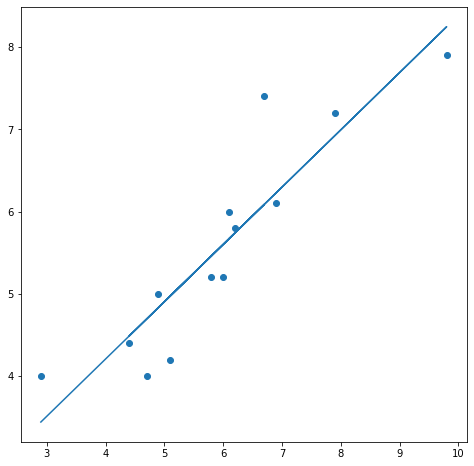

In [17]:
plt.figure(figsize=(8, 8));
plt.scatter(X,y)
plt.plot(X, h_result)

#### Use R2 score to evaluate LR equation output
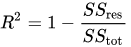
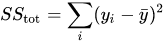
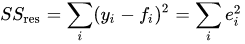
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [18]:
r2 = r2_score(h_result, y)

print("With Theta_0 = {} and Theta_1 = {} r2_score = {}".format(theta_0, theta_1, r2))

With Theta_0 = 1.4197277682935774 and Theta_1 = 0.6967771849708557 r2_score = 0.7838317352453122


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [19]:
theta_0 = 0
theta_1 = 0
Learning_rate = 0.01

In [20]:
X0 = np.ones(len(X))

h_x = (np.array([X0, X]).T) @ (np.array([theta_0, theta_1]).T) 

J = (1/(2 * len(X))) * (norm(h_x - y)**2)
    
DeltaJ_theta_0 = (1 / len(X)) * ((h_x - y) @ X0)
DeltaJ_theta_1 = (1 / len(X)) * ((h_x - y) @ X)
    
theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)

In [21]:
while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:
    
    h_x = (np.array([X0, X]).T) @ (np.array([theta_0, theta_1]).T) 
    
    J = (1/(2 * len(X))) * (norm(h_x - y)**2)
    
    DeltaJ_theta_0 = (1 / len(X)) * ((h_x - y) @ X0)
    DeltaJ_theta_1 = (1 / len(X)) * ((h_x - y) @ X)

    theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
    theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [22]:
# The Same result as the first one

h = theta_0 + theta_1 * x
h

0.696777184970856*x + 1.41972776829358

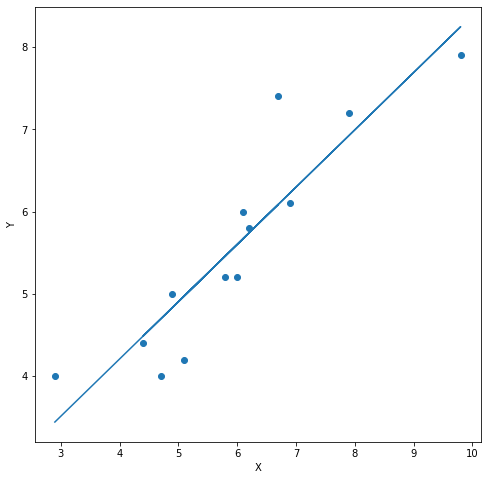

In [23]:
plt.figure(figsize=(8, 8));
plt.scatter(X,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.plot(X, h_x)

In [24]:
r2 = r2_score(h_x, y)

print("With Theta_0 = {} and Theta_1 = {} r2_score = {}".format(theta_0, theta_1, r2))

With Theta_0 = 1.4197277682935783 and Theta_1 = 0.6967771849708556 r2_score = 0.7838326890111241


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [25]:
theta_0 = 0
theta_1 = 0
Learning_rate = 0.01

X0 = np.ones(len(X))

h_x = (np.array([X0, X]).T) @ (np.array([theta_0, theta_1]).T) 

Loss_Function = []
J = (1/(2 * len(X))) * (norm(h_x - y)**2)
Loss_Function.append(J)

DeltaJ_theta_0 = (1 / len(X)) * ((h_x - y) @ X0)
DeltaJ_theta_1 = (1 / len(X)) * ((h_x - y) @ X)
    
theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)

iteration = 1
while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:
    
    h_x = (np.array([X0, X]).T) @ (np.array([theta_0, theta_1]).T) 
    
    J = (1/(2 * len(X))) * (norm(h_x - y)**2)
    Loss_Function.append(J)
    iteration += 1
    
    DeltaJ_theta_0 = (1 / len(X)) * ((h_x - y) @ X0)
    DeltaJ_theta_1 = (1 / len(X)) * ((h_x - y) @ X)

    theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
    theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)

iterations = list(range(1, iteration +1))

### Plot loss vs. iterations

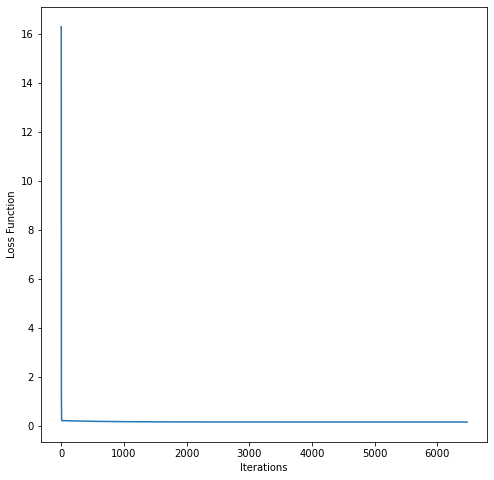

In [26]:
plt.figure(figsize=(8, 8));
plt.xlabel('Iterations');
plt.ylabel('Loss Function');
plt.plot(iterations, Loss_Function)

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [32]:
MultipleLR = pd.read_csv("MultipleLR.csv", header=None)
MultipleLR

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [36]:
X0 = np.ones(MultipleLR.shape[0])
X1 = np.array(MultipleLR[0])
X2 = np.array(MultipleLR[1])
X3 = np.array(MultipleLR[2])

y = np.array(MultipleLR[3])

### Repeat your implementation but for more than one variable

In [117]:
theta_0 = 0
theta_1 = 0
theta_2 = 0
theta_3 = 0

Learning_rate = 0.0001

In [118]:
h_multi = (np.array([X0, X1, X2, X3]).T) @ (np.array([theta_0, theta_1, theta_2, theta_3]).T) 

Loss_Function = []
J = (1/(4 * len(X))) * (norm(h_multi - y)**2)
Loss_Function.append(J)

DeltaJ_theta_0 = (1 / len(X0)) * ((h_multi - y) @ X0)
DeltaJ_theta_1 = (1 / len(X0)) * ((h_multi - y) @ X1)
DeltaJ_theta_2 = (1 / len(X0)) * ((h_multi - y) @ X2)
DeltaJ_theta_3 = (1 / len(X0)) * ((h_multi - y) @ X3)
    
theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)
theta_2 = theta_2 - (Learning_rate * DeltaJ_theta_2)
theta_3 = theta_3 - (Learning_rate * DeltaJ_theta_3)

In [119]:
iteration = 1
while abs(DeltaJ_theta_0) > 0.01 or abs(DeltaJ_theta_1) > 0.01 or abs(DeltaJ_theta_2) > 0.01 or abs(DeltaJ_theta_3) > 0.01:
#for i in range(500):   
    h_multi = (np.array([X0, X1, X2, X3]).T) @ (np.array([theta_0, theta_1, theta_2, theta_3]).T)
    
    J = (1/(4 * len(X))) * (norm(h_multi - y)**2)
    Loss_Function.append(J)
    iteration += 1
    
    DeltaJ_theta_0 = (1 / len(X0)) * ((h_multi - y) @ X0)
    DeltaJ_theta_1 = (1 / len(X0)) * ((h_multi - y) @ X1)
    DeltaJ_theta_2 = (1 / len(X0)) * ((h_multi - y) @ X2)
    DeltaJ_theta_3 = (1 / len(X0)) * ((h_multi - y) @ X3)

    theta_0 = theta_0 - (Learning_rate * DeltaJ_theta_0)
    theta_1 = theta_1 - (Learning_rate * DeltaJ_theta_1)
    theta_2 = theta_2 - (Learning_rate * DeltaJ_theta_2)
    theta_3 = theta_3 - (Learning_rate * DeltaJ_theta_3)


iterations = list(range(1, iteration +1))

In [120]:
print(theta_0, theta_1, theta_2, theta_3)

-3.8174646484334556 0.3559437552170627 0.5410630689550797 1.162616316612884


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [121]:
h_multi

array([152.64769882, 185.02217199, 181.73373724, 199.63894807,
       139.25973436, 103.88035332, 150.30277802, 112.96840299,
       174.52909294, 164.48674269, 143.48806053, 142.30130526,
       186.48438084, 152.45812874, 151.28027502, 189.05108398,
       143.58378812, 181.83297306, 177.26839133, 158.37583941,
       176.53681563, 174.63372208, 167.67676987, 150.68825406,
       191.1205512 ])

In [122]:
y

array([152, 185, 180, 196, 142, 101, 149, 115, 175, 164, 141, 141, 184,
       152, 148, 192, 147, 183, 177, 159, 177, 175, 175, 149, 192],
      dtype=int64)

### Plot loss vs. iterations

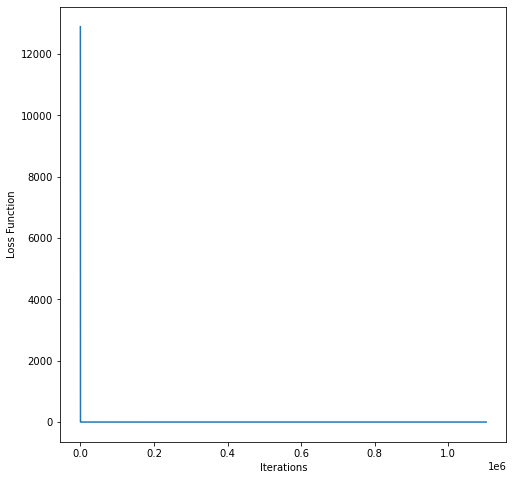

In [123]:
plt.figure(figsize=(8, 8));
plt.xlabel('Iterations');
plt.ylabel('Loss Function');
plt.plot(iterations, Loss_Function)

#### Use R2 score to evaluate LR equation output

In [ ]:
r2 = r2_score(h_multi, y)

print("With Theta_0 = {}, Theta_1 = {}, Theta_2 = {}, Theta_3 = {}".format(theta_0, theta_1, theta_2, theta_3))
print("r2 score = {}".format(r2))

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
RegData = RegData.to_numpy()

inputs = RegData[ : , : -1 ]
outputs = RegData[ : , -1 : ]

In [142]:
LR = LinearRegression().fit(inputs, outputs)

In [147]:
#Paramaters
print(LR.coef_)

[[0.69452919]]


In [146]:
#R2
print(LR.score(inputs, outputs))

0.8213156778363775


In [148]:
hypothesis = LR.predict(inputs)

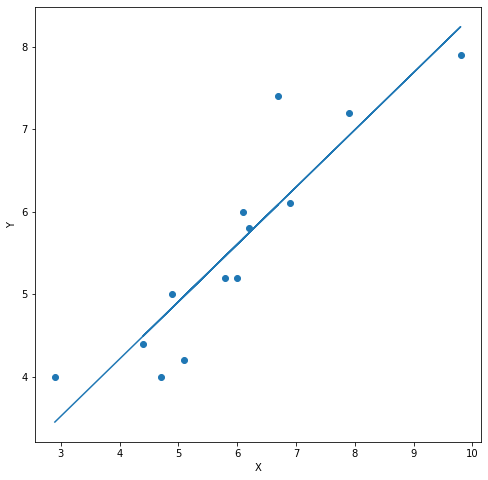

In [150]:
plt.figure(figsize=(8, 8));
plt.scatter(inputs,outputs);
plt.xlabel('X');
plt.ylabel('Y');
plt.plot(inputs, hypothesis);

### Repeat for Mulivariate

In [151]:
MultipleLR = MultipleLR.to_numpy()

inputs = MultipleLR[ : , : -1 ]
outputs = MultipleLR[ : , -1 : ]

In [152]:
LR = LinearRegression().fit(inputs, outputs)

In [153]:
#Paramaters
print(LR.coef_)

[[0.35593822 0.54251876 1.16744422]]


In [154]:
#R2
print(LR.score(inputs, outputs))

0.98966157894484
